In [23]:
import pandas as pd
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

from wordcloud import WordCloud

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [24]:
data = pd.read_csv('./data.csv')

data.head()

,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet
0,35293835,2022-07-29 22:45:25+00:00,1da00c8852cc9da2,1553149724965969921,en,0,0,0,0,Twitter Web App,OK never heard of this. cc @traddingtonbear \n...
1,306923598,2022-07-29 21:34:24+00:00,47ff4825f135014a,1553131856287207424,en,0,0,0,0,Twitter for iPhone,@RussInCheshire Shit education system!
2,247699711,2022-07-29 20:25:05+00:00,3fc4ee9a5c7f6631,1553114410213941252,en,2,0,0,0,Twitter for iPhone,@bennewmark Sadly very true. We need a big sha...
3,1320306297384980481,2022-07-29 20:06:49+00:00,5376859fe6806d5b,1553109813202124800,en,10,0,0,0,Twitter for iPhone,@GoodwinMJ Thanks to institutional racism &amp...
4,464232084,2022-07-29 17:22:27+00:00,32c74076799957c5,1553068448158187520,en,11,0,2,5,Twitter for Android,🚨Job opportunity @ParamedicsUK 🚨\n\nWe need a ...


In [25]:
for i in range(0, 5):
  print(i+1,': ', data['tweet'][i], "\n")

1 :  OK never heard of this. cc @traddingtonbear 

https://t.co/UUT3hOaBdx

I had heard of the Institute of Continuing Education, this seems less formal. 

2 :  @RussInCheshire Shit education system! 

3 :  @bennewmark Sadly very true. We need a big shake up of the system, starting with abolishing grammar schools and selective education. It’s amazing it still exists 

4 :  @GoodwinMJ Thanks to institutional racism &amp;  discrimination, lack of funding, poverty, poor educational standards &amp; the contempt shown by the establishment against the white skinned majority, 87% of Brits are being squeezed out of elite education.. Unis need to reflect UK society 

5 :  🚨Job opportunity @ParamedicsUK 🚨

We need a new Head of Education to lead our Education directorate and build on the amazing work of @ParamedicTutor and help develop education for our profession 

Check out the link for more information

https://t.co/6T52uUzyxe https://t.co/I9koIbTUyK 



In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27731 entries, 0 to 27730
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   author id      27731 non-null  object
 1   created_at     27731 non-null  object
 2   geo            27731 non-null  object
 3   id             27731 non-null  object
 4   lang           27731 non-null  object
 5   like_count     27731 non-null  object
 6   quote_count    27731 non-null  object
 7   reply_count    27731 non-null  object
 8   retweet_count  27731 non-null  object
 9   source         27731 non-null  object
 10  tweet          27731 non-null  object
dtypes: object(11)
memory usage: 2.3+ MB


# Data transformation

changing the tweets text to all lower case letters.

In [27]:
data['tweet'] = data['tweet'].astype(str).str.lower()
data.head()

,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet
0,35293835,2022-07-29 22:45:25+00:00,1da00c8852cc9da2,1553149724965969921,en,0,0,0,0,Twitter Web App,ok never heard of this. cc @traddingtonbear \n...
1,306923598,2022-07-29 21:34:24+00:00,47ff4825f135014a,1553131856287207424,en,0,0,0,0,Twitter for iPhone,@russincheshire shit education system!
2,247699711,2022-07-29 20:25:05+00:00,3fc4ee9a5c7f6631,1553114410213941252,en,2,0,0,0,Twitter for iPhone,@bennewmark sadly very true. we need a big sha...
3,1320306297384980481,2022-07-29 20:06:49+00:00,5376859fe6806d5b,1553109813202124800,en,10,0,0,0,Twitter for iPhone,@goodwinmj thanks to institutional racism &amp...
4,464232084,2022-07-29 17:22:27+00:00,32c74076799957c5,1553068448158187520,en,11,0,2,5,Twitter for Android,🚨job opportunity @paramedicsuk 🚨\n\nwe need a ...


## Tokenization

Break up the tweets into tokens. Tokens in this context are words, characters, or subwords.

We will use NLTK’s RegexpTokenizer to perform tokenization in combination with regular expressions.

In [28]:
regexp = RegexpTokenizer('\w+')

data['text_token']= data['tweet'].apply(regexp.tokenize)
data.head(3)

,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet,text_token
0,35293835,2022-07-29 22:45:25+00:00,1da00c8852cc9da2,1553149724965969921,en,0,0,0,0,Twitter Web App,ok never heard of this. cc @traddingtonbear \n...,"[ok, never, heard, of, this, cc, traddingtonbe..."
1,306923598,2022-07-29 21:34:24+00:00,47ff4825f135014a,1553131856287207424,en,0,0,0,0,Twitter for iPhone,@russincheshire shit education system!,"[russincheshire, shit, education, system]"
2,247699711,2022-07-29 20:25:05+00:00,3fc4ee9a5c7f6631,1553114410213941252,en,2,0,0,0,Twitter for iPhone,@bennewmark sadly very true. we need a big sha...,"[bennewmark, sadly, very, true, we, need, a, b..."


## Stopwords
Stop words are words in a stop list which are dropped before analysing natural language data since they don’t contain valuable information (like “will”, “and”, “or”, “has”, …).

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/waleacloud/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

# Extend the list with our own custom stopwords
my_stopwords = ['https', 'http', 'url', 'amp', '&amp']
stopwords.extend(my_stopwords)

# Remove stopwords
data['text_token'] = data['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
data.head(3)

,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet,text_token
0,35293835,2022-07-29 22:45:25+00:00,1da00c8852cc9da2,1553149724965969921,en,0,0,0,0,Twitter Web App,ok never heard of this. cc @traddingtonbear \n...,"[ok, never, heard, cc, traddingtonbear, co, uu..."
1,306923598,2022-07-29 21:34:24+00:00,47ff4825f135014a,1553131856287207424,en,0,0,0,0,Twitter for iPhone,@russincheshire shit education system!,"[russincheshire, shit, education, system]"
2,247699711,2022-07-29 20:25:05+00:00,3fc4ee9a5c7f6631,1553114410213941252,en,2,0,0,0,Twitter for iPhone,@bennewmark sadly very true. we need a big sha...,"[bennewmark, sadly, true, need, big, shake, sy..."


## Remove infrequent words
We first change the format of text_token to strings and keep only words which are longer than 2 letters


In [31]:
data['text_string'] = data['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

data[['tweet', 'text_token', 'text_string']].head()

# Create a list of all words
all_words = ' '.join([word for word in data['text_string']])

In [32]:
# Tokenize all_words
tokenized_words = nltk.tokenize.word_tokenize(all_words)

# Create a frequency distribution which records the number of times each word has occurred:
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
fdist

FreqDist({'education': 18914, 'system': 7463, 'students': 5097, 'school': 2906, 'people': 2377, 'schools': 2375, 'children': 2039, 'one': 1438, 'get': 1433, 'news': 1428, ...})

Now we can use our fdist dictionary to drop words which occur less than a certain amount of times (usually we use a value of 3 or 4).
Since our dataset is really small, we filter out few words and set the value to greater or equal to 2.

In [33]:
data['text_string_fdist'] = data['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))
data[['tweet', 'text_token', 'text_string', 'text_string_fdist']].head()


,tweet,text_token,text_string,text_string_fdist
0,ok never heard of this. cc @traddingtonbear \n...,"[ok, never, heard, cc, traddingtonbear, co, uu...",never heard traddingtonbear uut3hoabdx heard i...,never heard traddingtonbear uut3hoabdx heard i...
1,@russincheshire shit education system!,"[russincheshire, shit, education, system]",russincheshire shit education system,russincheshire shit education system
2,@bennewmark sadly very true. we need a big sha...,"[bennewmark, sadly, true, need, big, shake, sy...",bennewmark sadly true need big shake system st...,bennewmark sadly true need big shake system st...
3,@goodwinmj thanks to institutional racism &amp...,"[goodwinmj, thanks, institutional, racism, dis...",goodwinmj thanks institutional racism discrimi...,goodwinmj thanks institutional racism discrimi...
4,🚨job opportunity @paramedicsuk 🚨\n\nwe need a ...,"[job, opportunity, paramedicsuk, need, new, he...",job opportunity paramedicsuk need new head edu...,job opportunity paramedicsuk need new head edu...


## Lemmatization
Next, we perfom lemmatization.
lemmatisation is the algorithmic process of determining the dictionary form of a word based on its intended meaning. 

In [34]:
nltk.download('wordnet')
nltk.download('wordnet_ic')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/waleacloud/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet_ic to
[nltk_data]     /Users/waleacloud/nltk_data...
[nltk_data]   Package wordnet_ic is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/waleacloud/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [35]:
wordnet_lem = WordNetLemmatizer()
data['text_string_lem'] = data['text_string_fdist'].apply(wordnet_lem.lemmatize)

# Note that in some datasets, there are no words to lemmatize. We can check this as follows:
# check if the columns are equal
data['is_equal']= (data['text_string_fdist'] == data['text_string_lem'])

# show level count
data.is_equal.value_counts()

True    27731
Name: is_equal, dtype: int64

In [36]:
# check to see the state of our data frame
data

,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet,text_token,text_string,text_string_fdist,text_string_lem,is_equal
0,35293835,2022-07-29 22:45:25+00:00,1da00c8852cc9da2,1553149724965969921,en,0,0,0,0,Twitter Web App,ok never heard of this. cc @traddingtonbear \n...,"[ok, never, heard, cc, traddingtonbear, co, uu...",never heard traddingtonbear uut3hoabdx heard i...,never heard traddingtonbear uut3hoabdx heard i...,never heard traddingtonbear uut3hoabdx heard i...,True
1,306923598,2022-07-29 21:34:24+00:00,47ff4825f135014a,1553131856287207424,en,0,0,0,0,Twitter for iPhone,@russincheshire shit education system!,"[russincheshire, shit, education, system]",russincheshire shit education system,russincheshire shit education system,russincheshire shit education system,True
2,247699711,2022-07-29 20:25:05+00:00,3fc4ee9a5c7f6631,1553114410213941252,en,2,0,0,0,Twitter for iPhone,@bennewmark sadly very true. we need a big sha...,"[bennewmark, sadly, true, need, big, shake, sy...",bennewmark sadly true need big shake system st...,bennewmark sadly true need big shake system st...,bennewmark sadly true need big shake system st...,True
3,1320306297384980481,2022-07-29 20:06:49+00:00,5376859fe6806d5b,1553109813202124800,en,10,0,0,0,Twitter for iPhone,@goodwinmj thanks to institutional racism &amp...,"[goodwinmj, thanks, institutional, racism, dis...",goodwinmj thanks institutional racism discrimi...,goodwinmj thanks institutional racism discrimi...,goodwinmj thanks institutional racism discrimi...,True
4,464232084,2022-07-29 17:22:27+00:00,32c74076799957c5,1553068448158187520,en,11,0,2,5,Twitter for Android,🚨job opportunity @paramedicsuk 🚨\n\nwe need a ...,"[job, opportunity, paramedicsuk, need, new, he...",job opportunity paramedicsuk need new head edu...,job opportunity paramedicsuk need new head edu...,job opportunity paramedicsuk need new head edu...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27726,33289415,2022-07-25 17:58:16+00:00,0af014accd6f6e99,1551627912062926850,en,6,0,6,0,Twitter for iPhone,@scotnational easy.\n\ndevolve what has always...,"[scotnational, easy, devolve, always, differen...",scotnational easy devolve always different sco...,scotnational easy devolve always different sco...,scotnational easy devolve always different sco...,True
27727,2980250451,2022-07-25 17:34:26+00:00,612fbfbb701b1d3a,1551621911918018561,en,0,0,1,0,Twitter for Android,@linaire_mcrae @2351onthelist @dmck52 @bumptio...,"[linaire_mcrae, 2351onthelist, dmck52, bumptio...",linaire_mcrae 2351onthelist dmck52 bumptiousfe...,linaire_mcrae 2351onthelist dmck52 bumptiousfe...,linaire_mcrae 2351onthelist dmck52 bumptiousfe...,True
27728,846302397311959041,2022-07-25 16:03:08+00:00,1b676cd4b8a8684a,1551598936951033858,en,2,1,0,0,Twitter for iPhone,first day of our summer @adventures_22 holiday...,"[first, day, summer, adventures_22, holiday, c...",first day summer adventures_22 holiday club ch...,first day summer adventures_22 holiday club ch...,first day summer adventures_22 holiday club ch...,True
27729,4755149428,2022-07-25 15:10:51+00:00,1aca7d8a9c3faae1,1551585779650105349,en,3,0,0,1,Twitter for Android,"@erdmuted quite right. a largly apathetic, po...","[erdmuted, quite, right, largly, apathetic, po...",erdmuted quite right largly apathetic poorly i...,erdmuted quite right largly apathetic poorly i...,erdmuted quite right largly apathetic poorly i...,True


### Wordcloud
We want to see the frequency of the different words present in the dataset 

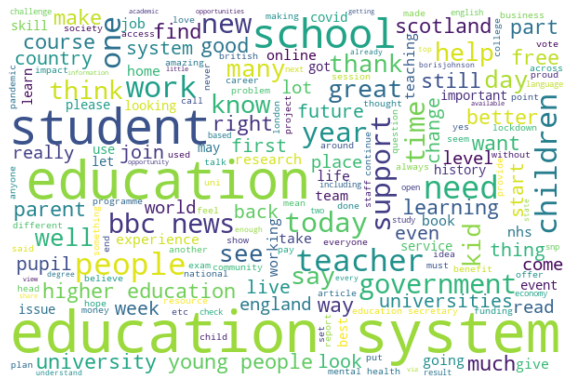

In [37]:
%matplotlib inline

all_words_lem = ' '.join([word for word in data['text_string_lem']])
wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2,
                     background_color='white', 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [38]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/waleacloud/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

# Most common words
fd.most_common(3)

[('education', 18914), ('system', 7463), ('students', 5097)]

In [40]:
fd.tabulate(5)

education    system  students    school    people 
    18914      7463      5097      2906      2377 


### Plot common words

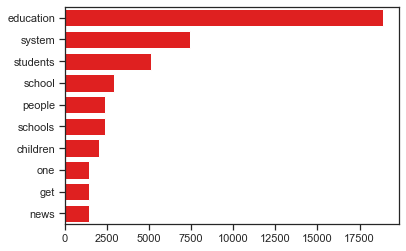

In [41]:
sns.set_theme(style="ticks")

# Obtain top 10 words
top_10 = fd.most_common(10)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))

sns.barplot(y=fdist.index, x=fdist.values, color='red');


In [42]:
fig = px.bar(y=fdist.index, x=fdist.values)

# sort values
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})

# show plot
fig.show()

# Sentiment Analysis

We will be using VADER lexicon
NLTK provides a simple rule-based model for general sentiment analysis called VADER, which stands for “Valence Aware Dictionary and Sentiment Reasoner” (Hutto & Gilbert, 2014).

In [43]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/waleacloud/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [44]:
analyzer = SentimentIntensityAnalyzer()

# get polarity
data['polarity'] = data['text_string_lem'].apply(lambda x: analyzer.polarity_scores(x))
data.tail(3)

,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet,text_token,text_string,text_string_fdist,text_string_lem,is_equal,polarity
27728,846302397311959041,2022-07-25 16:03:08+00:00,1b676cd4b8a8684a,1551598936951033858,en,2,1,0,0,Twitter for iPhone,first day of our summer @adventures_22 holiday...,"[first, day, summer, adventures_22, holiday, c...",first day summer adventures_22 holiday club ch...,first day summer adventures_22 holiday club ch...,first day summer adventures_22 holiday club ch...,True,"{'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'comp..."
27729,4755149428,2022-07-25 15:10:51+00:00,1aca7d8a9c3faae1,1551585779650105349,en,3,0,0,1,Twitter for Android,"@erdmuted quite right. a largly apathetic, po...","[erdmuted, quite, right, largly, apathetic, po...",erdmuted quite right largly apathetic poorly i...,erdmuted quite right largly apathetic poorly i...,erdmuted quite right largly apathetic poorly i...,True,"{'neg': 0.271, 'neu': 0.729, 'pos': 0.0, 'comp..."
27730,15997703,2022-07-25 14:53:36+00:00,4393349f368f67a1,1551581436766978048,en,99,4,11,12,Twitter for iPhone,"as someone with a masters in chinese (i know, ...","[someone, masters, chinese, know, know, idea, ...",someone masters chinese know know idea brainy ...,someone masters chinese know know idea brainy ...,someone masters chinese know know idea brainy ...,True,"{'neg': 0.0, 'neu': 0.88, 'pos': 0.12, 'compou..."


### Transform data
We now need to tranform our data to be able to perform accurate sentiment analysis

In [45]:
# Change data structure
data = pd.concat(
    [data.drop(['polarity'], axis=1), 
     data['polarity'].apply(pd.Series)], axis=1)
data.head(3)

,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet,text_token,text_string,text_string_fdist,text_string_lem,is_equal,neg,neu,pos,compound
0,35293835,2022-07-29 22:45:25+00:00,1da00c8852cc9da2,1553149724965969921,en,0,0,0,0,Twitter Web App,ok never heard of this. cc @traddingtonbear \n...,"[ok, never, heard, cc, traddingtonbear, co, uu...",never heard traddingtonbear uut3hoabdx heard i...,never heard traddingtonbear uut3hoabdx heard i...,never heard traddingtonbear uut3hoabdx heard i...,True,0.000,1.000,0.000,0.0000
1,306923598,2022-07-29 21:34:24+00:00,47ff4825f135014a,1553131856287207424,en,0,0,0,0,Twitter for iPhone,@russincheshire shit education system!,"[russincheshire, shit, education, system]",russincheshire shit education system,russincheshire shit education system,russincheshire shit education system,True,0.545,0.455,0.000,-0.5574
2,247699711,2022-07-29 20:25:05+00:00,3fc4ee9a5c7f6631,1553114410213941252,en,2,0,0,0,Twitter for iPhone,@bennewmark sadly very true. we need a big sha...,"[bennewmark, sadly, true, need, big, shake, sy...",bennewmark sadly true need big shake system st...,bennewmark sadly true need big shake system st...,bennewmark sadly true need big shake system st...,True,0.195,0.519,0.286,0.4767


In [46]:
# Create new variable with sentiment "neutral," "positive" and "negative"
data['sentiment'] = data['compound'].apply(lambda x: 'positive' if x>0 else 'neutral' if x==0 else 'negative')
data.head(4)

,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,...,text_token,text_string,text_string_fdist,text_string_lem,is_equal,neg,neu,pos,compound,sentiment
0,35293835,2022-07-29 22:45:25+00:00,1da00c8852cc9da2,1553149724965969921,en,0,0,0,0,Twitter Web App,...,"[ok, never, heard, cc, traddingtonbear, co, uu...",never heard traddingtonbear uut3hoabdx heard i...,never heard traddingtonbear uut3hoabdx heard i...,never heard traddingtonbear uut3hoabdx heard i...,True,0.000,1.000,0.000,0.0000,neutral
1,306923598,2022-07-29 21:34:24+00:00,47ff4825f135014a,1553131856287207424,en,0,0,0,0,Twitter for iPhone,...,"[russincheshire, shit, education, system]",russincheshire shit education system,russincheshire shit education system,russincheshire shit education system,True,0.545,0.455,0.000,-0.5574,negative
2,247699711,2022-07-29 20:25:05+00:00,3fc4ee9a5c7f6631,1553114410213941252,en,2,0,0,0,Twitter for iPhone,...,"[bennewmark, sadly, true, need, big, shake, sy...",bennewmark sadly true need big shake system st...,bennewmark sadly true need big shake system st...,bennewmark sadly true need big shake system st...,True,0.195,0.519,0.286,0.4767,positive
3,1320306297384980481,2022-07-29 20:06:49+00:00,5376859fe6806d5b,1553109813202124800,en,10,0,0,0,Twitter for iPhone,...,"[goodwinmj, thanks, institutional, racism, dis...",goodwinmj thanks institutional racism discrimi...,goodwinmj thanks institutional racism discrimi...,goodwinmj thanks institutional racism discrimi...,True,0.431,0.494,0.075,-0.9287,negative


### Analyze data


In [47]:
# Tweet with highest positive sentiment
data.loc[data['compound'].idxmax()].values

array(['575152349', '2022-06-16 18:58:50+00:00', '3206c3452acf92f7',
       '1537510025970831361', 'en', '1', '0', '0', '0',
       'Twitter for Android',
       'as winners of a charity award last year (best training and education charity) we are attending the charity awards 2022. \n\ngood luck to all the nominated charities. we are delighted to be able to celebrate the incredible work charities do throughout the uk\n\n#charityawards #london https://t.co/elt00ekriw',
       list(['winners', 'charity', 'award', 'last', 'year', 'best', 'training', 'education', 'charity', 'attending', 'charity', 'awards', '2022', 'good', 'luck', 'nominated', 'charities', 'delighted', 'able', 'celebrate', 'incredible', 'work', 'charities', 'throughout', 'uk', 'charityawards', 'london', 'co', 'elt00ekriw']),
       'winners charity award last year best training education charity attending charity awards 2022 good luck nominated charities delighted able celebrate incredible work charities throughout charity

In [48]:
# Tweet with highest negative sentiment 
data.loc[data['compound'].idxmin()].values

array(['474038706', '2020-08-02 19:46:00+00:00', '20bc436b37c1b13a',
       '1290010985428746240', 'en', '1', '0', '1', '0',
       'Twitter for iPhone',
       '@casuallyattired @superleague @saints1890 gang crime goes deeper into politics. you have a broken system. bad schools =poor/no education =poor/no jobs = no money =desperate /sad people=drug trade = violence =death . poor housing 4poor people =slums =crime=gangs=violence =death. iyou have no options',
       list(['casuallyattired', 'superleague', 'saints1890', 'gang', 'crime', 'goes', 'deeper', 'politics', 'broken', 'system', 'bad', 'schools', 'poor', 'education', 'poor', 'jobs', 'money', 'desperate', 'sad', 'people', 'drug', 'trade', 'violence', 'death', 'poor', 'housing', '4poor', 'people', 'slums', 'crime', 'gangs', 'violence', 'death', 'iyou', 'options']),
       'casuallyattired superleague saints1890 gang crime goes deeper politics broken system bad schools poor education poor jobs money desperate sad people drug trade v

### Visualize data

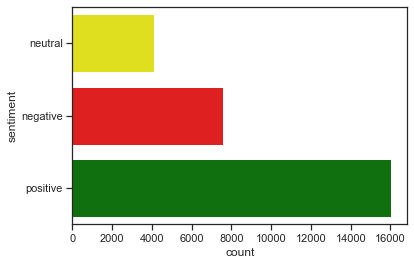

In [49]:

# Number of tweets 
sns.countplot(y='sentiment', 
             data=data, 
             palette=['yellow','red', 'green']
             );

In [65]:
# check sentiment percentage distribution
# len(data['sentiment'])
# len(data[data['sentiment'] == 'positive'])
len_of_tweets = len(data)
len_of_pweets = len(data[data['sentiment'] == 'positive'])
len_of_nweets = len(data[data['sentiment'] == 'negative'])
len_of_ntrweets = len(data[data['sentiment'] == 'neutral'])

percent_ptweets = (100*len(data[data['sentiment'] == 'positive'])/len_of_tweets)
percent_ntweets = (100*len(data[data['sentiment'] == 'negative'])/len_of_tweets)
percent_ntrtweets = (100*len(data[data['sentiment'] == 'neutral'])/len_of_tweets)

sentiment_percent = pd.DataFrame({
    'sentiments': ['positive', 'negative', 'neutral'],
    'percentages': [percent_ptweets, percent_ntweets, percent_ntrtweets]
  })
sentiment_percent


,sentiments,percentages
0,positive,57.859435
1,negative,27.344849
2,neutral,14.795716


In [78]:
fig = px.pie(sentiment_percent, values='percentages', names='sentiments', title='Percentage sentiment distribution',
            color='sentiments', color_discrete_map={'positive':'green',
                                 'negative':'red',
                                 'neutral':'yellow'
            }
)
fig.show()